In [120]:
import statistics
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Background
Premium Stabilization Programs data can be found here: https://www.cms.gov/CCIIO/Programs-and-Initiatives/Premium-Stabilization-Programs/

Medical Loss Ratio data can be found here: https://www.cms.gov/CCIIO/Resources/Data-Resources/mlr.html

We can find Medical Loss Ratio data for specific insurance companies here: https://www.cms.gov/apps/mlr/mlr-search.aspx#/?state=All&reporting_year=2015

I have also downloaded the files (in this GitHub repo except for the 2012 data since it was too big and Git wouldn't let me push) in case they get removed from the websites later on.

## 2015 Benefit Year

Relevant files:
- /Premium-Stabilization-Programs/June-30-2016-RA-and-RI-Summary-Report-5CR-063016.pdf
- /MLR-Analysis/Medical-Loss-Ratio/MLR_DataFilesPUF_20161019/Part1_2_Summary_Data_Premium_Claims.csv

In the XLSX file, column D in row FED_REINS_PAYMENTS represents the reinsurance payment amount, column D and I in row FED_RISK_ADJ_NET_PAYMENTS represents the HHS risk adjustment transfer amount in the individual and small group markets, respectively.

In [121]:
# read in the data
data_2015 = pd.read_csv("Medical-Loss-Ratio/MLR_DataFilesPUF_20161019/Part1_2_Summary_Data_Premium_Claims.csv")

# only keep the rows that we are looking up
a_data_2015 = data_2015.loc[data_2015["ROW_LOOKUP_CODE"].isin({"FED_REINS_PAYMENTS", "FED_RISK_ADJ_NET_PAYMENTS"})]

# only keep the columns that contain numbers that we are looking up
b_data_2015 = a_data_2015[["MR_SUBMISSION_TEMPLATE_ID", "ROW_LOOKUP_CODE", "CMM_INDIVIDUAL_Q1", "CMM_SMALL_GROUP_Q1"]]

# remove rows that contain null values in *BOTH* columns that we are looking up
# (thus, threshold = 3 null columns to drop the column)
c_data_2015 = b_data_2015.dropna(thresh=3)

# drop duplicates in the CMM_INDIVIDUAL_Q1 and CMM_SMALL_GROUP_Q1 rows. 
# for some reason, companies are reported twice.
d_data_2015 = c_data_2015.drop_duplicates(subset=["CMM_INDIVIDUAL_Q1","CMM_SMALL_GROUP_Q1"])

# create one dataframe for reinsurance payments and another for risk adjustment payments
data_2015_reins = d_data_2015.loc[d_data_2015["ROW_LOOKUP_CODE"].isin({"FED_REINS_PAYMENTS"})]
data_2015_riskadj = d_data_2015.loc[d_data_2015["ROW_LOOKUP_CODE"].isin({"FED_RISK_ADJ_NET_PAYMENTS"})]


In [122]:
data_2015_reins_individual = data_2015_reins["CMM_INDIVIDUAL_Q1"].dropna()
data_2015_riskadj_individual = data_2015_riskadj["CMM_INDIVIDUAL_Q1"].dropna()
data_2015_riskadj_smallgroup = data_2015_riskadj["CMM_SMALL_GROUP_Q1"].dropna()

data_2015_reins_individual_nonzero = data_2015_reins["CMM_INDIVIDUAL_Q1"].where(data_2015_reins["CMM_INDIVIDUAL_Q1"] != 0).dropna()
data_2015_riskadj_individual_nonzero = data_2015_riskadj["CMM_INDIVIDUAL_Q1"].where(data_2015_riskadj["CMM_INDIVIDUAL_Q1"] != 0).dropna()
data_2015_riskadj_smallgroup_nonzero = data_2015_riskadj["CMM_SMALL_GROUP_Q1"].where(data_2015_riskadj["CMM_SMALL_GROUP_Q1"] != 0).dropna()

In [123]:
print("Results of Basic Statistic Analysis")

print("\n\nAnalysis of Reinsurance Payments 2015")
print("Mean (with zeroes) = " + str(statistics.mean(data_2015_reins_individual)))
print("Mean (without zeroes) = " + str(statistics.mean(data_2015_reins_individual_nonzero)))
print("Median (with zeroes) = " + str(statistics.median(data_2015_reins_individual)))
print("Median (without zeroes) = " + str(statistics.median(data_2015_reins_individual_nonzero)))
print("StdDev (with zeroes) = " + str(statistics.stdev(data_2015_reins_individual)))
print("StdDev (without zeroes) = " + str(statistics.stdev(data_2015_reins_individual_nonzero)))
print("Variance (with zeroes) = " + str(statistics.variance(data_2015_reins_individual)))
print("Variance (without zeroes) = " + str(statistics.variance(data_2015_reins_individual_nonzero)))
print("Max Value = " + str(max(data_2015_reins_individual)))
print("Min Non-Zero Value = " + str(min(data_2015_reins_individual_nonzero)))
print("Sample Size (with zeroes) = " + str(len(data_2015_reins_individual)))
print("Sample Size (without zeroes) = " + str(len(data_2015_reins_individual_nonzero)))
print("Sum = " + str(sum(data_2015_reins_individual)))
      
print("\nAnalysis of Individual Market Risk Adjustment Payments 2015")
print("Mean (with zeroes) = " + str(statistics.mean(data_2015_riskadj_individual)))
print("Mean (without zeroes) = " + str(statistics.mean(data_2015_riskadj_individual_nonzero)))
print("Median (with zeroes) = " + str(statistics.median(data_2015_riskadj_individual)))
print("Median (without zeroes) = " + str(statistics.median(data_2015_riskadj_individual_nonzero)))
print("StdDev (with zeroes) = " + str(statistics.stdev(data_2015_riskadj_individual)))
print("StdDev (without zeroes) = " + str(statistics.stdev(data_2015_riskadj_individual_nonzero)))
print("Variance (with zeroes) = " + str(statistics.variance(data_2015_riskadj_individual)))
print("Variance (without zeroes) = " + str(statistics.variance(data_2015_riskadj_individual_nonzero)))
print("Max Value = " + str(max(data_2015_riskadj_individual)))
print("Min Non-Zero Value = " + str(min(data_2015_riskadj_individual_nonzero)))
print("Sample Size (with zeroes) = " + str(len(data_2015_riskadj_individual)))
print("Sample Size (without zeroes) = " + str(len(data_2015_riskadj_individual_nonzero)))
print("Sum = " + str(sum(data_2015_riskadj_individual)))

print("\nAnalysis of Small Group Market Risk Adjustment Payments 2015")
print("Mean (with zeroes) = " + str(statistics.mean(data_2015_riskadj_smallgroup)))
print("Mean (without zeroes) = " + str(statistics.mean(data_2015_riskadj_smallgroup_nonzero)))
print("Median (with zeroes) = " + str(statistics.median(data_2015_riskadj_smallgroup)))
print("Median (without zeroes) = " + str(statistics.median(data_2015_riskadj_smallgroup_nonzero)))
print("StdDev (with zeroes) = " + str(statistics.stdev(data_2015_riskadj_smallgroup)))
print("StdDev (without zeroes) = " + str(statistics.stdev(data_2015_riskadj_smallgroup_nonzero)))
print("Variance (with zeroes) = " + str(statistics.variance(data_2015_riskadj_smallgroup)))
print("Variance (without zeroes) = " + str(statistics.variance(data_2015_riskadj_smallgroup_nonzero)))
print("Max Value = " + str(max(data_2015_riskadj_smallgroup)))
print("Min Non-Zero Value = " + str(min(data_2015_riskadj_smallgroup_nonzero)))
print("Sample Size (with zeroes) = " + str(len(data_2015_riskadj_smallgroup)))
print("Sample Size (without zeroes) = " + str(len(data_2015_riskadj_smallgroup_nonzero)))
print("Sum = " + str(sum(data_2015_riskadj_smallgroup_nonzero)))

print("\nTotal Sum = " + str(sum(data_2015_reins_individual) 
                           + sum(data_2015_riskadj_individual) 
                           +  sum(data_2015_riskadj_smallgroup_nonzero)))

Results of Basic Statistic Analysis


Analysis of Reinsurance Payments 2015
Mean (with zeroes) = 20058449.631
Mean (without zeroes) = 20095872.1117
Median (with zeroes) = 4524839.43
Median (without zeroes) = 4533277.07
StdDev (with zeroes) = 64489499.66906441
StdDev (without zeroes) = 64543905.685033105
Variance (with zeroes) = 4.15889556757e+15
Variance (without zeroes) = 4.16591576108e+15
Max Value = 1059085035.93
Min Non-Zero Value = 3607.0
Sample Size (with zeroes) = 537
Sample Size (without zeroes) = 536
Sum = 10771387451.9

Analysis of Individual Market Risk Adjustment Payments 2015
Mean (with zeroes) = 271352.456617
Mean (without zeroes) = 337525.831774
Median (with zeroes) = 0.0
Median (without zeroes) = 147.45
StdDev (with zeroes) = 24611688.38164475
StdDev (without zeroes) = 27452820.959203873
Variance (with zeroes) = 6.05735204995e+14
Variance (without zeroes) = 7.53657378618e+14
Max Value = 334055030.0
Min Non-Zero Value = -218903904.11
Sample Size (with zeroes) = 811
Sampl

### Next Steps
Based on this above data, what I want to do the following:
- look at top 5 and bottom 5 outliers
- see is why so many entries are zero
- see why the sums are not 0
- graph the distribution of values

### Looking at top 5 and bottom 5 values

In [131]:
# looking at the top 5 and bottom 5 values
data_2015_reins_sort = data_2015_reins.sort_values(by=["CMM_INDIVIDUAL_Q1"])
data_2015_riskadj_individual_sort = data_2015_riskadj.sort_values(by=["CMM_INDIVIDUAL_Q1"])
data_2015_riskadj_individual_sort = data_2015_riskadj.sort_values(by=["CMM_SMALL_GROUP_Q1"])
# using the tail and head commands, we can see the top 5 and bottom 5 of tail and head.
# example: print(data_2015_reins_sort.tail())

        MR_SUBMISSION_TEMPLATE_ID     ROW_LOOKUP_CODE  CMM_INDIVIDUAL_Q1  \
283873                     145027  FED_REINS_PAYMENTS       2.834807e+08   
230677                     143275  FED_REINS_PAYMENTS       2.885161e+08   
220540                     143128  FED_REINS_PAYMENTS       3.249618e+08   
284245                     145031  FED_REINS_PAYMENTS       6.366792e+08   
283780                     145026  FED_REINS_PAYMENTS       1.059085e+09   

        CMM_SMALL_GROUP_Q1  
283873                 NaN  
230677                 NaN  
220540                 NaN  
284245                 NaN  
283780                 NaN  


##### These are the bottom 5 values for reinsurance:

40864                      135760  FED_REINS_PAYMENTS       0.000000e+00   
222307                     143153  FED_REINS_PAYMENTS       3.607000e+03   
194221                     142144  FED_REINS_PAYMENTS       4.144310e+03   
66067                      137277  FED_REINS_PAYMENTS       7.872000e+03   
196081                     142164  FED_REINS_PAYMENTS       7.903720e+03   
66160                      137278  FED_REINS_PAYMENTS       1.164300e+04 

I'm ignoring the zero. Perhaps we can find out which one was 0 from seeing the other value with ID 40864. Checking the PDF, we find that:

62637 John Alden Life Insurance Company MN 3,607.23 (93,357.87) (43,185.94)

75849 Freedom Life Insurance AZ  4,144.31  168,620.34 -

83396 The Health Plan of the Upper Ohio Valley OH  7,871.97  (74,715.60)  (306,668.86)

80431 Freedom Life Insurance SC  7,903.72  (7,622.19) -

72982 The Health Plan of the Upper Ohio Valley WV  11,643.23  (15,242.90)  (553,884.06)

##### These are the top 5 values for reinsurance:

283873                     145027  FED_REINS_PAYMENTS       2.834807e+08   
230677                     143275  FED_REINS_PAYMENTS       2.885161e+08   
220540                     143128  FED_REINS_PAYMENTS       3.249618e+08   
284245                     145031  FED_REINS_PAYMENTS       6.366792e+08   
283780                     145026  FED_REINS_PAYMENTS       1.059085e+09

Checking the PDF, we find that:

36096 Blue Cross Blue Shield of Illinois IL 283,480,714.30 23,056,950.67 10,877,027.26

Nothing matches 288,516,1...

27603 Blue Cross of California (Anthem BC) CA 324,961,807.80 (26,380,560.05) 98,210,694.17

33602 Blue Cross Blue Shield of Texas TX 636,679,178.58 38,571,557.86 11,386,899.21

Nothing matches 1,059,085... also, I searched the PDF and the Texas Blue Cross is the largest number in the category I could find.

### Graphing the Distribution of Values: A Histogram

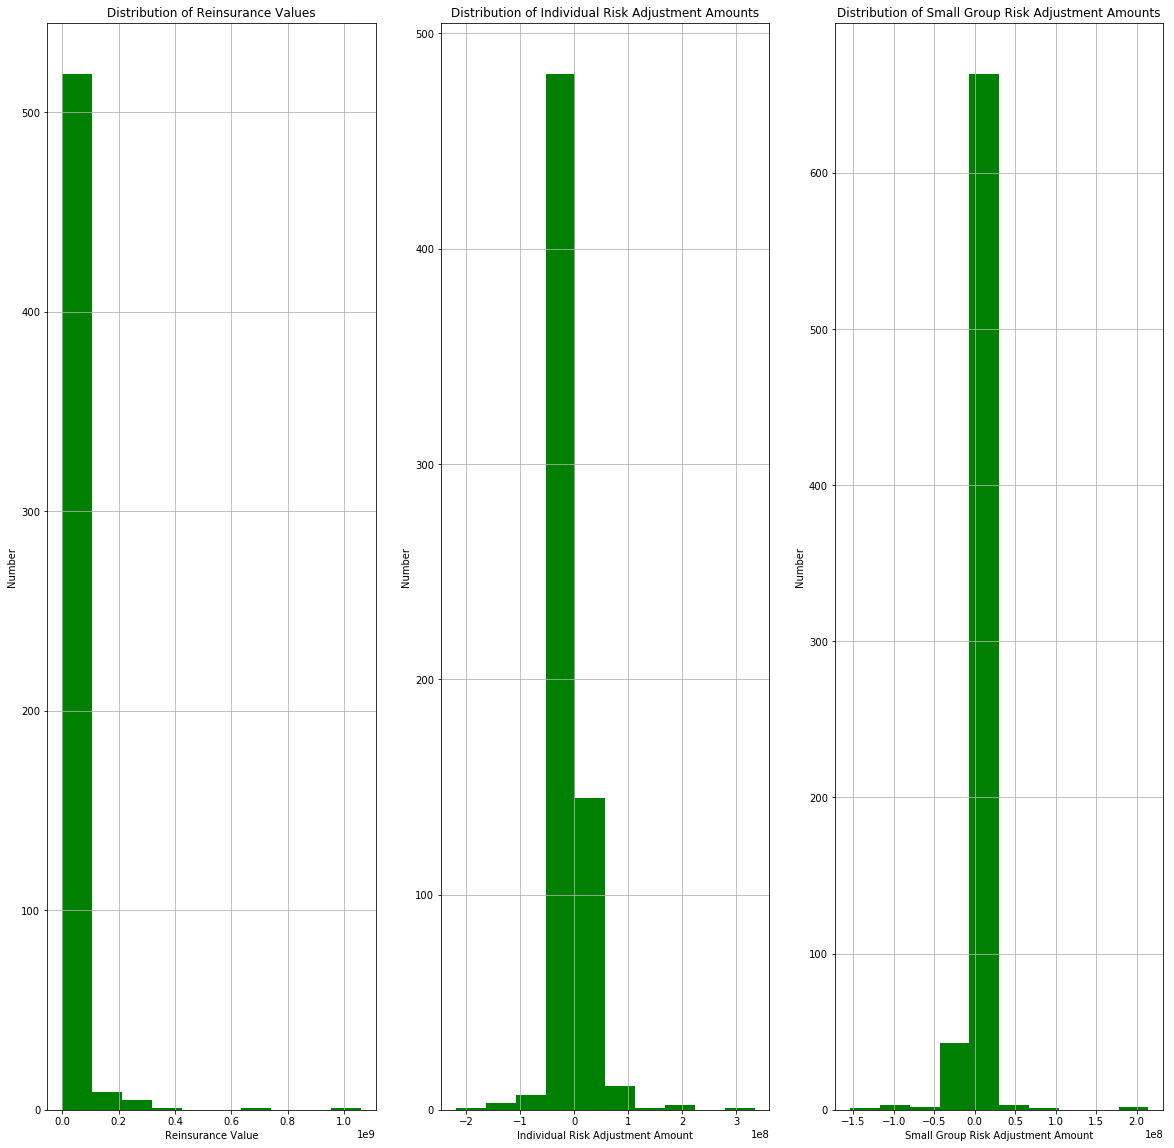

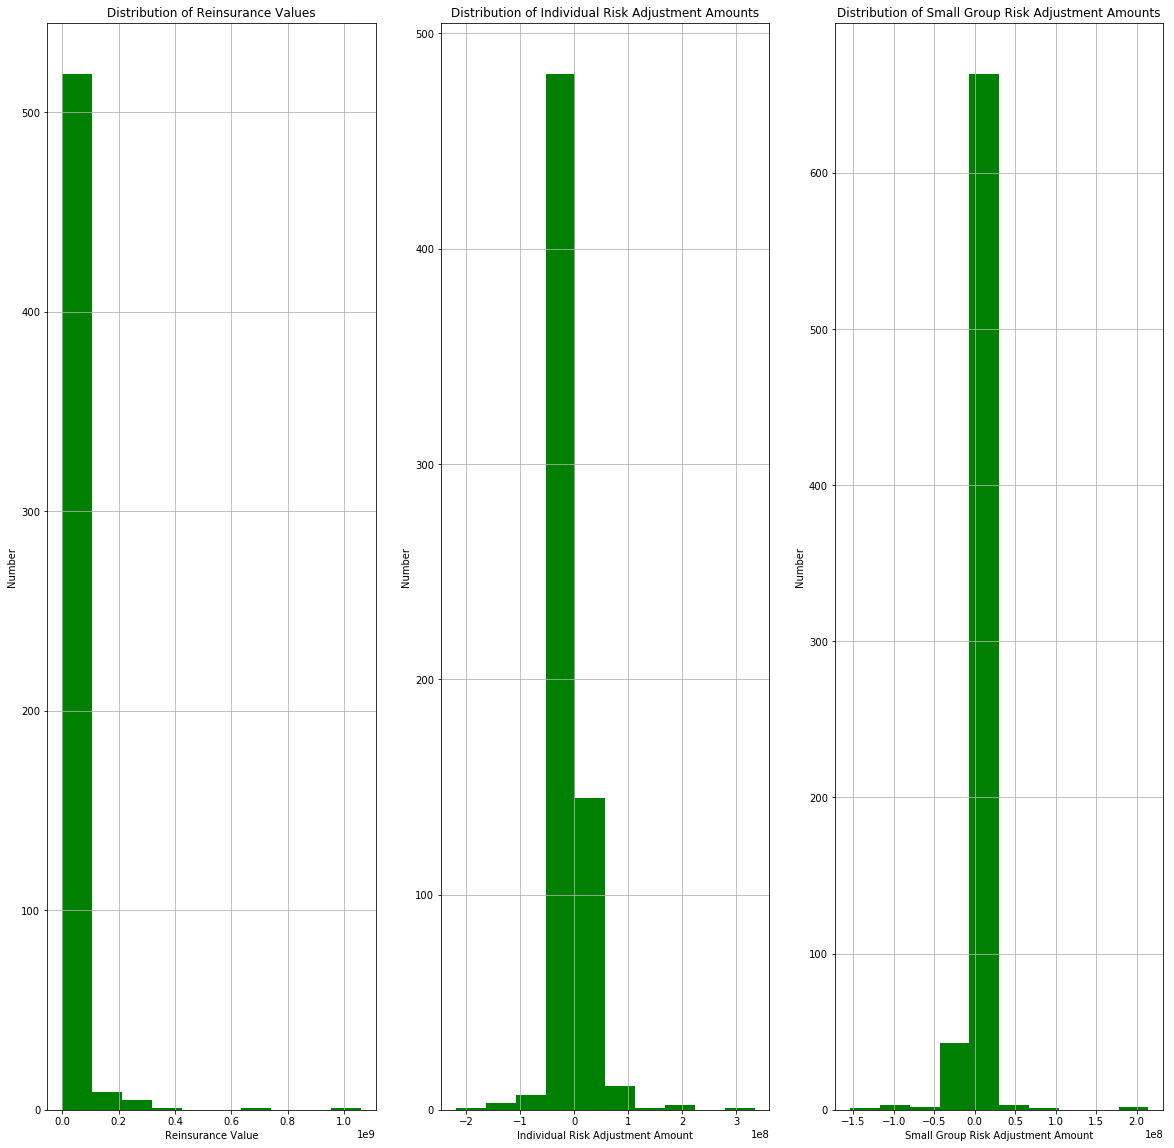

In [130]:
fig = plt.figure()

plt.subplot(131)
plt.hist(data_2015_reins_individual_nonzero.values, bins=None, facecolor='green')

plt.xlabel('Reinsurance Value')
plt.ylabel('Number')
plt.title('Distribution of Reinsurance Values')
plt.grid(True)

plt.subplot(132)
plt.hist(data_2015_riskadj_individual_nonzero.values, bins=None, facecolor='green')

plt.xlabel('Individual Risk Adjustment Amount')
plt.ylabel('Number')
plt.title('Distribution of Individual Risk Adjustment Amounts')
plt.grid(True)

plt.subplot(133)
plt.hist(data_2015_riskadj_smallgroup_nonzero.values, bins=None, facecolor='green')

plt.xlabel('Small Group Risk Adjustment Amount')
plt.ylabel('Number')
plt.title('Distribution of Small Group Risk Adjustment Amounts')
plt.grid(True)

fig.set_size_inches(20,20)
plt.show()

## 2014 Benefit Year

TBD 

Relevant files:

In the XLSX file, column D in row FED_REINS_PAYMENTS represents the reinsurance payment amount, column D and I in row FED_RISK_ADJ_NET_PAYMENTS represents the HHS risk adjustment transfer amount in the individual and small group markets, respectively.